In [1]:
from py2neo import Graph
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
graph = Graph(
    "bolt://localhost:7687",
    auth=("neo4j", "admin"),
)

## Plot fastRP embeddings

In [7]:
def plot_embedding(name, n_iter=1000, n_components=2, method="barnes_hut"):
    embeddings = graph.run(f"match (m:Movie) return m.fastRP_{name} as fastRP")
    embeddings = embeddings.data()
    embeddings = [[i for i in emb["fastRP"]] for emb in embeddings]
    embeddings_df = pd.DataFrame.from_records(embeddings)
    tsne = TSNE(n_components=n_components, method=method, perplexity=40, random_state=1, n_iter=n_iter, metric="cosine")
    embs = tsne.fit_transform(embeddings_df)
    df = pd.DataFrame()
    df['x'] = embs[:, 0]
    df['y'] = embs[:, 1]
    FS = (8, 5)
    fig, ax = plt.subplots(figsize=FS)
    # Make points translucent so we can visually identify regions with a high density of overlapping points
    ax.scatter(df.x, df.y, alpha=.1)

/Users/ioannisathanasiou/diploma/environ/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/ioannisathanasiou/diploma/environ/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


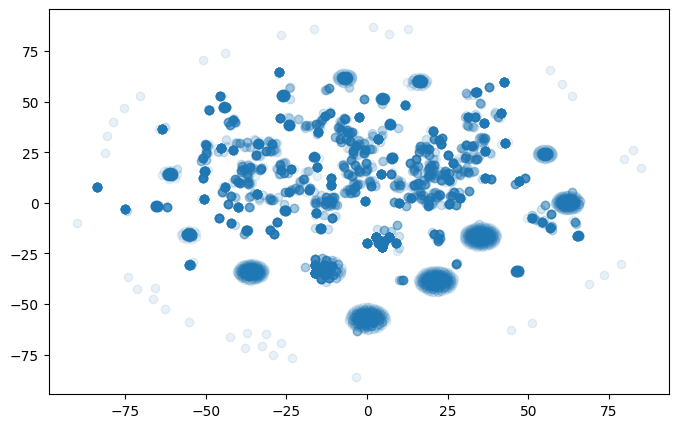

In [8]:
plot_embedding("genres")

/Users/ioannisathanasiou/diploma/environ/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/ioannisathanasiou/diploma/environ/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


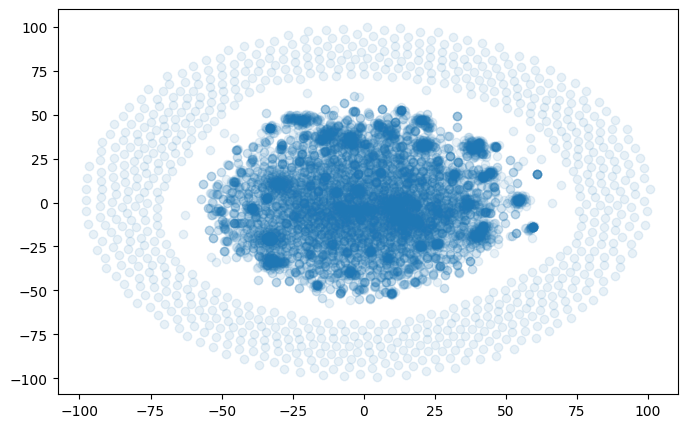

In [9]:
plot_embedding("keywords")

/Users/ioannisathanasiou/diploma/environ/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/ioannisathanasiou/diploma/environ/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


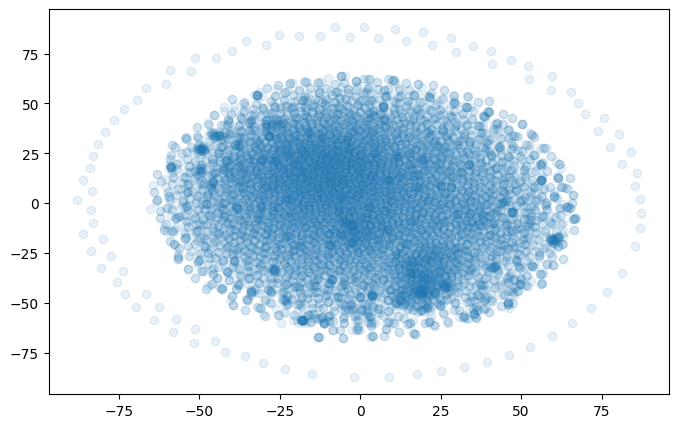

In [10]:
plot_embedding("cast")

/Users/ioannisathanasiou/diploma/environ/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/ioannisathanasiou/diploma/environ/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


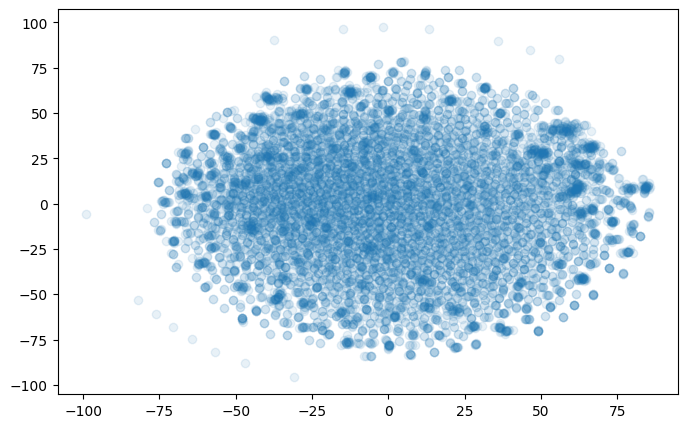

In [11]:
plot_embedding("crew")

/Users/ioannisathanasiou/diploma/environ/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/ioannisathanasiou/diploma/environ/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


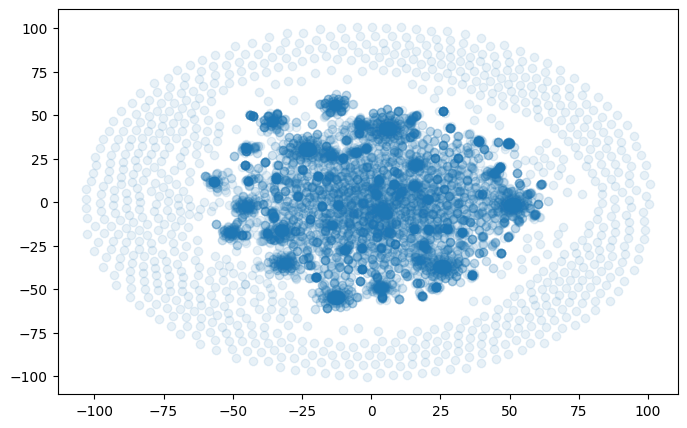

In [12]:
plot_embedding("production_companies")

/Users/ioannisathanasiou/diploma/environ/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/ioannisathanasiou/diploma/environ/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


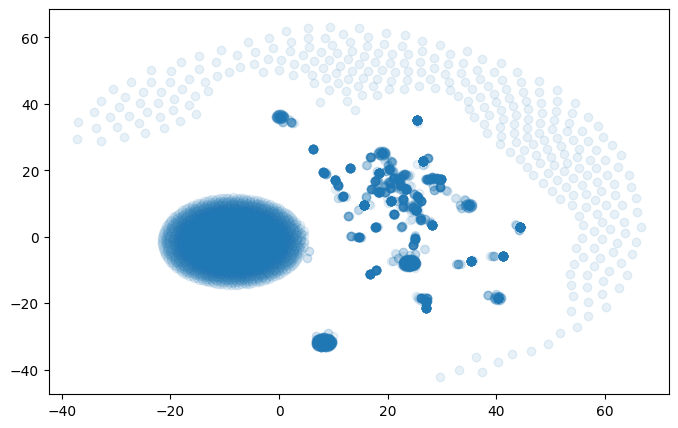

In [13]:
plot_embedding("production_countries")

/Users/ioannisathanasiou/diploma/environ/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/ioannisathanasiou/diploma/environ/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


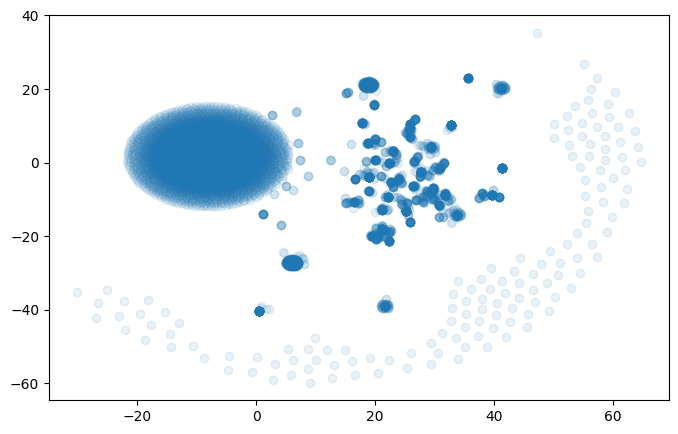

In [14]:
plot_embedding("spoken_languages")

/Users/ioannisathanasiou/diploma/environ/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/ioannisathanasiou/diploma/environ/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


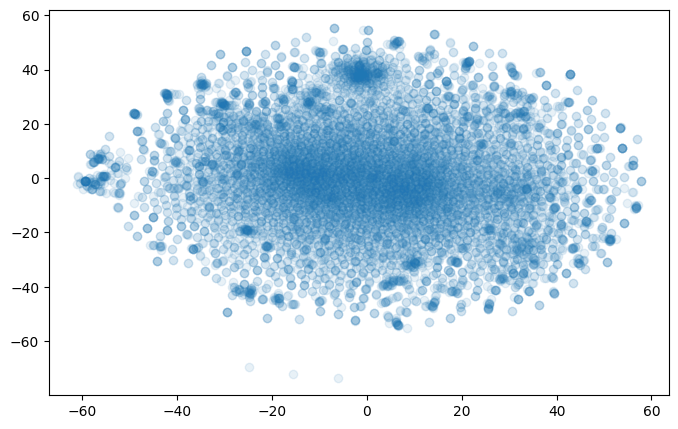

In [15]:
plot_embedding("COMBINED")

## Plot node2vec embeddings

In [31]:
def plot_node2vec_embedding(name, n_iter=10000, n_components=2, method="barnes_hut"):
    embeddings = graph.run(f"match (m:Movie) return m.node2vec_{name} as node2vec")
    embeddings = embeddings.data()
    embeddings = [[i for i in emb["node2vec"]] for emb in embeddings]
    embeddings_df = pd.DataFrame.from_records(embeddings)
    tsne = TSNE(n_components=n_components, method=method, perplexity=40, random_state=1, n_iter=n_iter, metric="cosine")
    embs = tsne.fit_transform(embeddings_df)
    df = pd.DataFrame()
    df['x'] = embs[:, 0]
    df['y'] = embs[:, 1]
    FS = (8, 5)
    fig, ax = plt.subplots(figsize=FS)
    # Make points translucent so we can visually identify regions with a high density of overlapping points
    ax.scatter(df.x, df.y, alpha=.1)

/Users/ioannisathanasiou/diploma/environ/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/ioannisathanasiou/diploma/environ/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


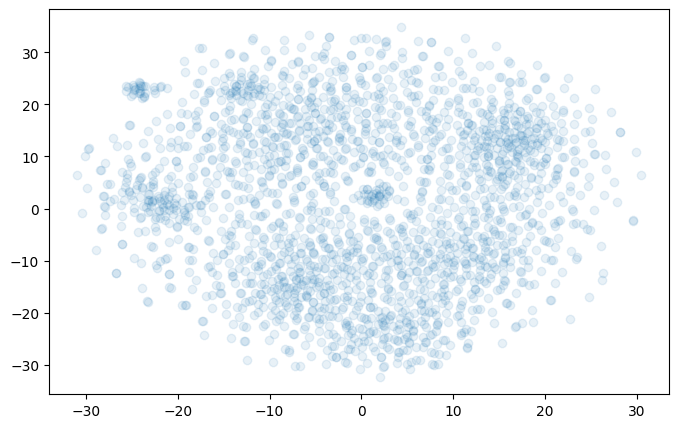

In [32]:
plot_node2vec_embedding("genres")

/Users/ioannisathanasiou/diploma/environ/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/ioannisathanasiou/diploma/environ/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


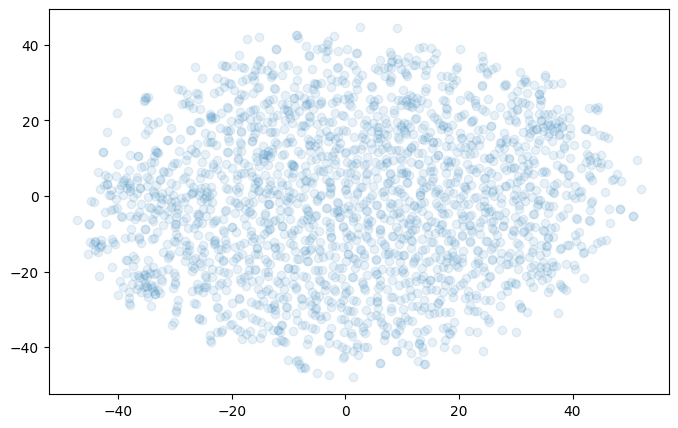

In [33]:
plot_node2vec_embedding("keywords")

/Users/ioannisathanasiou/diploma/environ/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/ioannisathanasiou/diploma/environ/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


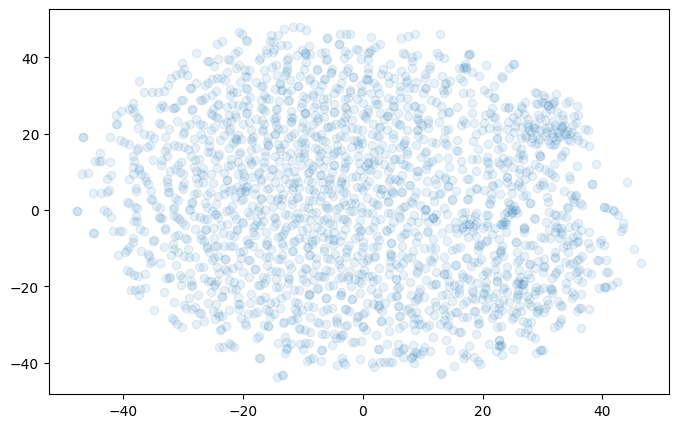

In [34]:
plot_node2vec_embedding("cast")

/Users/ioannisathanasiou/diploma/environ/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/ioannisathanasiou/diploma/environ/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


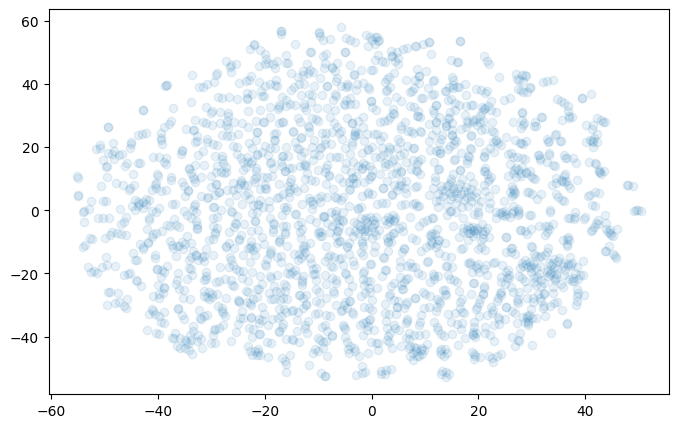

In [35]:
plot_node2vec_embedding("crew")

/Users/ioannisathanasiou/diploma/environ/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/ioannisathanasiou/diploma/environ/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


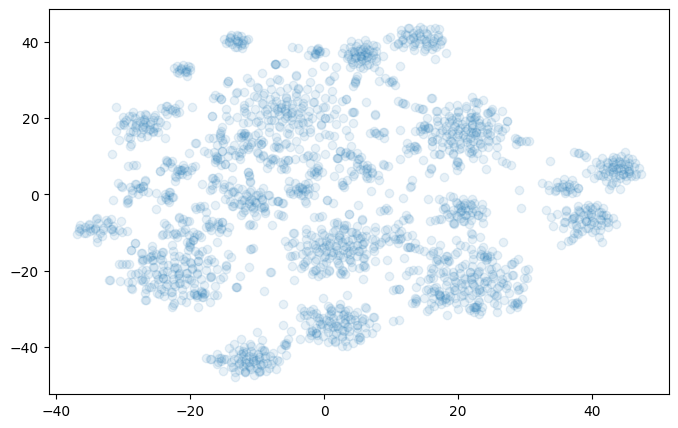

In [38]:
plot_node2vec_embedding("production_companies")

/Users/ioannisathanasiou/diploma/environ/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/ioannisathanasiou/diploma/environ/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


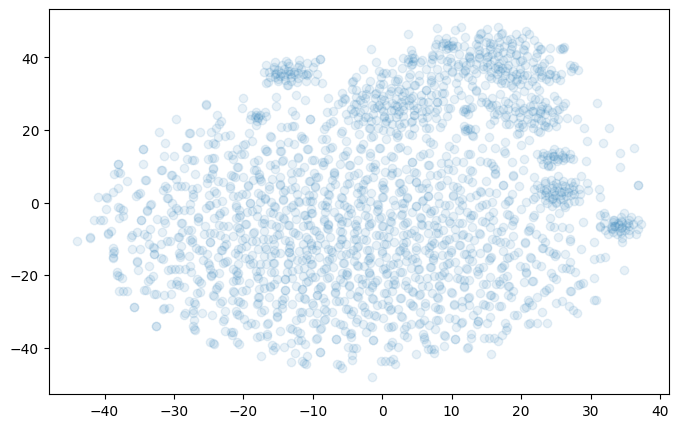

In [36]:
plot_node2vec_embedding("production_countries")

/Users/ioannisathanasiou/diploma/environ/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/ioannisathanasiou/diploma/environ/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


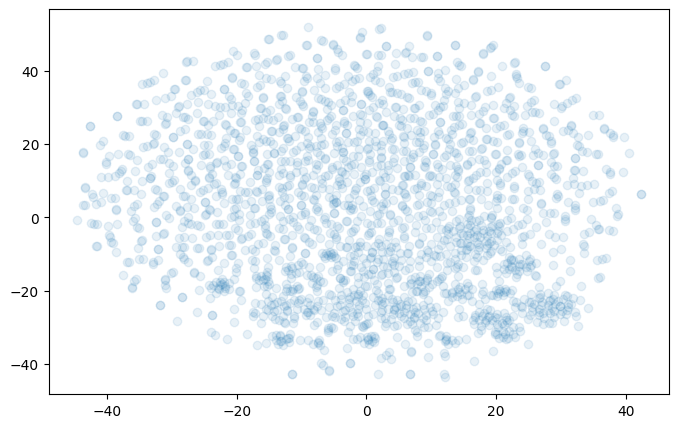

In [37]:
plot_node2vec_embedding("spoken_languages")

/Users/ioannisathanasiou/diploma/environ/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/ioannisathanasiou/diploma/environ/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


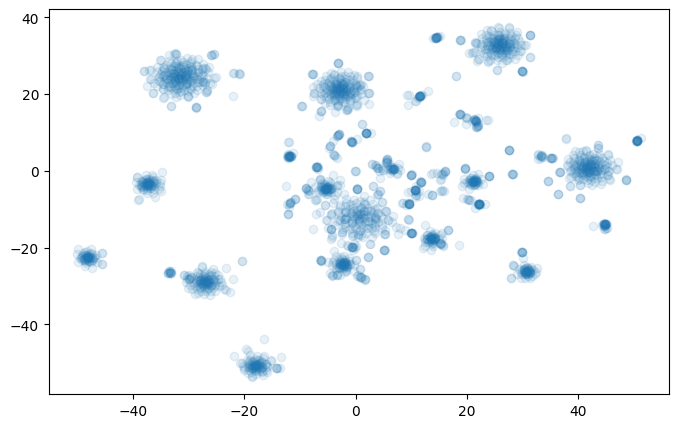

In [39]:
plot_node2vec_embedding("COMBINED")

## Plot SAGE embeddings

In [45]:
def plot_SAGE_embedding(name, n_iter=10000, n_components=2, method="barnes_hut"):
    embeddings = graph.run(f"match (m:Movie) return m.SAGE_{name} as SAGE")
    embeddings = embeddings.data()
    embeddings = [[i for i in emb["SAGE"]] for emb in embeddings]
    embeddings_df = pd.DataFrame.from_records(embeddings)
    tsne = TSNE(n_components=n_components, method=method, perplexity=40, random_state=1, n_iter=n_iter, metric="cosine")
    embs = tsne.fit_transform(embeddings_df)
    df = pd.DataFrame()
    df['x'] = embs[:, 0]
    df['y'] = embs[:, 1]
    FS = (8, 5)
    fig, ax = plt.subplots(figsize=FS)
    # Make points translucent so we can visually identify regions with a high density of overlapping points
    ax.scatter(df.x, df.y, alpha=.1)

/Users/ioannisathanasiou/diploma/environ/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/ioannisathanasiou/diploma/environ/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


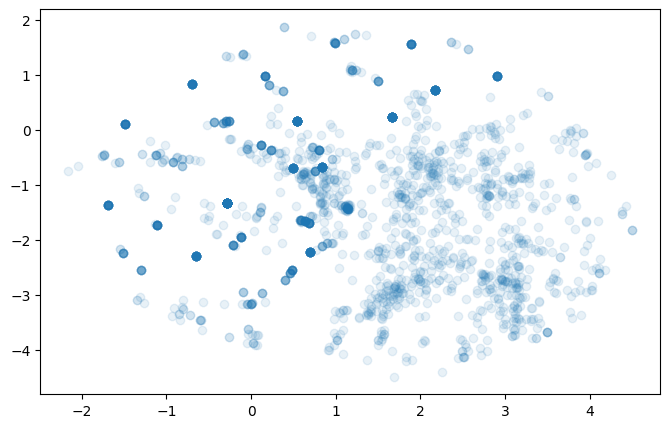

In [46]:
plot_SAGE_embedding("genres")

/Users/ioannisathanasiou/diploma/environ/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/ioannisathanasiou/diploma/environ/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


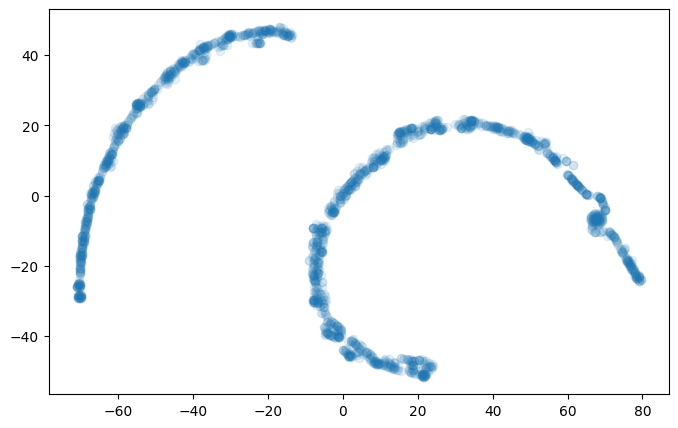

In [47]:
plot_SAGE_embedding("keywords")

/Users/ioannisathanasiou/diploma/environ/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/ioannisathanasiou/diploma/environ/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


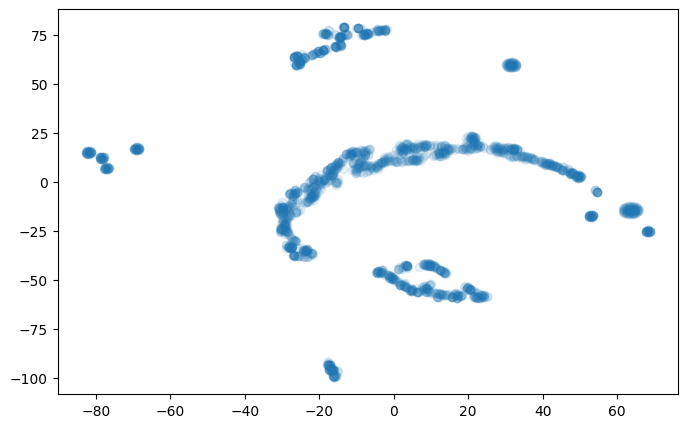

In [48]:
plot_SAGE_embedding("production_companies")

/Users/ioannisathanasiou/diploma/environ/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/ioannisathanasiou/diploma/environ/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


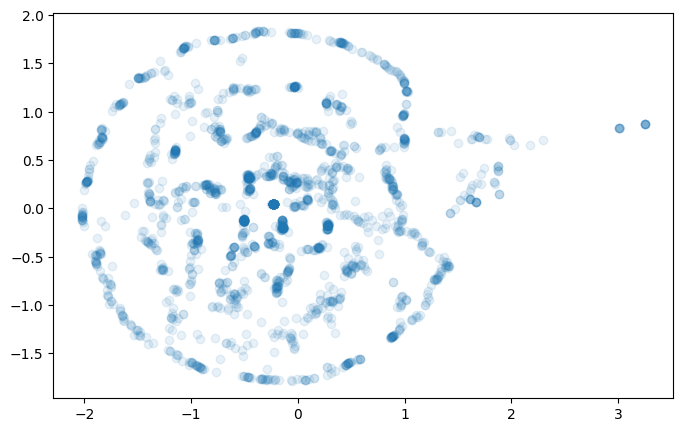

In [49]:
plot_SAGE_embedding("production_countries")

/Users/ioannisathanasiou/diploma/environ/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/ioannisathanasiou/diploma/environ/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


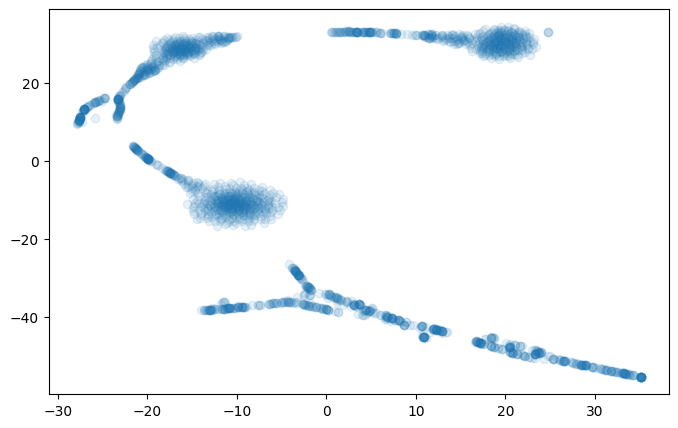

In [50]:
plot_SAGE_embedding("cast")

/Users/ioannisathanasiou/diploma/environ/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/ioannisathanasiou/diploma/environ/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


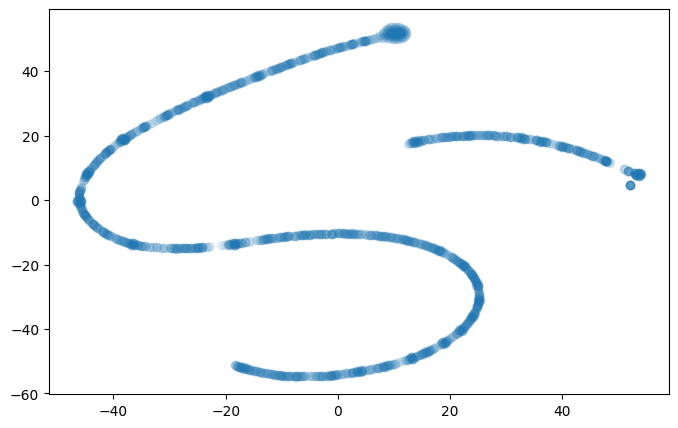

In [51]:
plot_SAGE_embedding("crew")

/Users/ioannisathanasiou/diploma/environ/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/ioannisathanasiou/diploma/environ/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


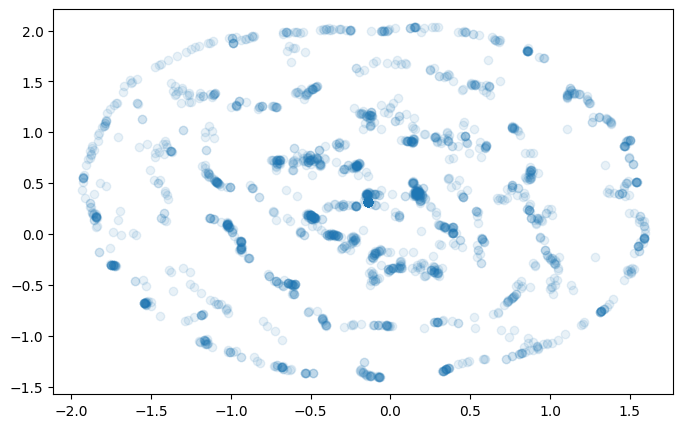

In [52]:
plot_SAGE_embedding("COMBINED")